# 종속변수와 상관성이 있는 변수

'행정동내_지하철역_수' - '사업체_수'

## #01. 패키지

In [1]:
# 경고 메시지 출력 방지
import warnings
warnings.filterwarnings("ignore")

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier

# 군집을 위한 패키지
from sklearn.cluster import KMeans

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 데이터

In [4]:
origin = read_excel("행정동병합테스트22_최종데이터.xlsx")
origin.head()

FileNotFoundError: [Errno 2] No such file or directory: '행정동병합테스트22_최종데이터.xlsx'

## #03. 데이터 살펴보기

In [56]:
origin.columns

Index(['시도명', '시군구코드', '시군구명', '행정동코드', '읍면동명', '면적', '서울시전체면적_대비_구성비', '인구_수',
       '아동인구', '65세이상인구', '장애인_인구', '인구밀도', '행정동내_지하철역_수', '행정동내_의료기관',
       '사업체_수', '개소_공영_민영', '면수_공영_민영', '행정동별_공원_산_수', '하천및한강여부', '사회복지시설_수',
       '공공체육시설_수', '문화시설_수', '학교_수', '보육시설'],
      dtype='object')

In [57]:
tmp = origin.filter(['읍면동명', '사업체_수', '행정동내_지하철역_수'])
tmp.head()

,읍면동명,사업체_수,행정동내_지하철역_수
0,청운효자동,992,0
1,사직동,3532,2
2,삼청동,708,0
3,부암동,558,0
4,평창동,747,0


### 산점도 그래프

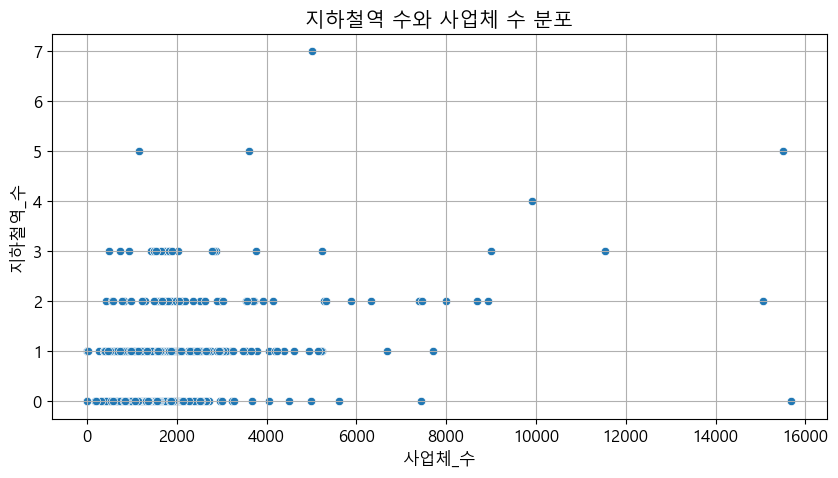

In [58]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin, x='사업체_수', y = '행정동내_지하철역_수')
plt.title("지하철역 수와 사업체 수 분포")
plt.xlabel("사업체_수")
plt.ylabel("지하철역_수")

plt.grid()
plt.show()
plt.close()

## #04. 군집화 모델

### 모델 구현

In [59]:
# X = origin[['사업체_수', '행정동내_지하철역_수']].values
# X = origin.iloc[:, [origin.columns.get_loc('사업체_수'), origin.columns.get_loc('행정동내_지하철역_수')]].values

X = tmp.iloc[:,[1,2]].values
m = X.shape[0] #전체 데이터 개수
n = X.shape[1] #특징 개수(극장수, 은행 수)

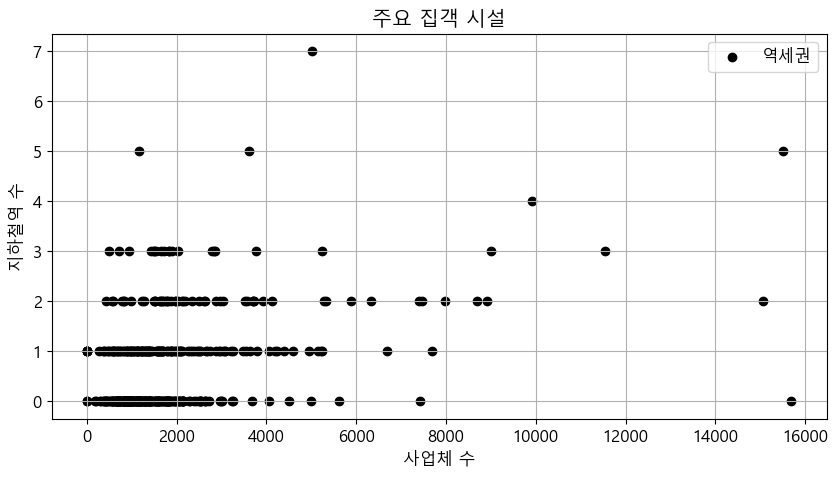

In [60]:
plt.scatter(X[:,0], X[:,1], c='black', label='역세권')
plt.xlabel('사업체 수')
plt.ylabel('지하철역 수')
plt.legend()
plt.title('주요 집객 시설')
plt.grid()
plt.show()
plt.close()

### k값 결정

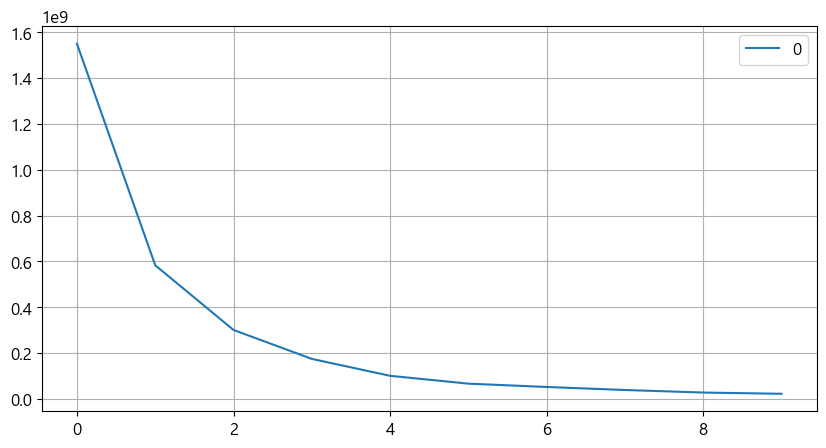

In [61]:
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(X)
    value = kmeans.inertia_
    inertia.append(value)

DataFrame(inertia).plot()
plt.grid()

> 4이후로 감소폭이 크지 않으므로 k=4로 결정

## #05. K-means clustering

In [62]:
kmeans = KMeans(n_clusters=4).fit(X) #군집 4개로 나누겠다
tmp['클러스터_수치'] = kmeans.labels_
tmp

,읍면동명,사업체_수,행정동내_지하철역_수,클러스터_수치
0,청운효자동,992,0,2
1,사직동,3532,2,0
2,삼청동,708,0,2
3,부암동,558,0,2
4,평창동,747,0,2
...,...,...,...,...
421,성내제2동,1889,3,2
422,성내제3동,2451,1,0
423,길동,5153,1,3
424,둔촌제1동,15,1,2


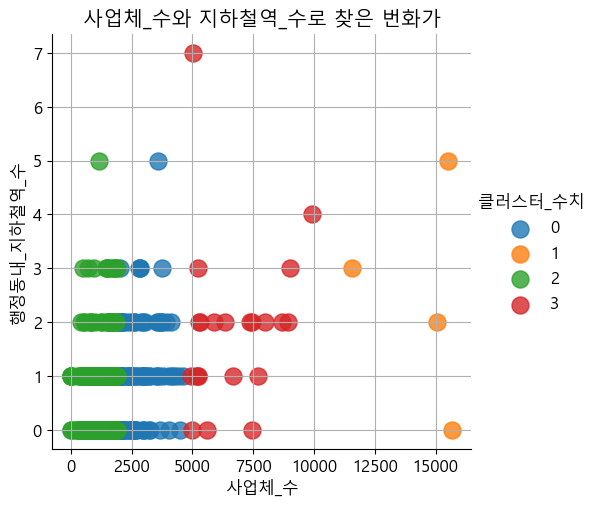

In [67]:
sb.lmplot(x='사업체_수', y='행정동내_지하철역_수', data=tmp, fit_reg=False, scatter_kws={"s": 150}, hue="클러스터_수치")
plt.title("사업체_수와 지하철역_수로 찾은 번화가")
plt.grid()

In [84]:
tmp[tmp['클러스터_수치']==0]

,읍면동명,사업체_수,행정동내_지하철역_수,클러스터_수치
1,사직동,3532,2,0
12,창신제1동,2245,1,0
17,소공동,3792,1,0
20,필동,2960,2,0
45,한남동,3706,2,0
...,...,...,...,...
401,잠실본동,3012,0,0
405,잠실제6동,2649,1,0
418,천호제2동,3676,0,0
420,성내제1동,2086,1,0


In [85]:
tmp[tmp['클러스터_수치']==1]

,읍면동명,사업체_수,행정동내_지하철역_수,클러스터_수치
8,종로1.2.3.4가동,15501,5,1
24,신당동,11544,3,1
276,가산동,15057,2,1
368,역삼제1동,15691,0,1


>1번이 가장 이상적인 역세권

In [86]:
tmp[tmp['클러스터_수치']==2]

,읍면동명,사업체_수,행정동내_지하철역_수,클러스터_수치
0,청운효자동,992,0,2
2,삼청동,708,0,2
3,부암동,558,0,2
4,평창동,747,0,2
5,무악동,577,0,2
...,...,...,...,...
417,천호제1동,1564,0,2
419,천호제3동,1879,0,2
421,성내제2동,1889,3,2
424,둔촌제1동,15,1,2


In [88]:
tmp[tmp['클러스터_수치']==3]

,읍면동명,사업체_수,행정동내_지하철역_수,클러스터_수치
9,종로5.6가동,7389,2,3
18,회현동,9002,3,3
19,명동,6681,1,3
22,광희동,8682,2,3
23,을지로동,8923,2,3
40,한강로동,5006,7,3
62,성수2가제3동,5617,0,3
80,용신동,5236,3,3
214,서교동,9910,4,3
251,가양제1동,5242,1,3
